## Task 3: Exploratory Data Analysis (EDA)
Description: Perform exploratory data analysis to understand the underlying structure and trends in the data.

####  Objectives:
- Compute summary statistics (mean, median, variance, etc.).
- Visualize the data using histograms, scatter plots, and box plots.
- Identify correlations between numerical features using a correlation matrix.
- Generate a report summarizing insights from the EDA.


Tools: Python, pandas, matplotlib, seaborn.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
processed_df = pd.read_csv("data/processed_ethiopian_airlines_data.csv", index_col=[0])
processed_df.head(2)

,seat_type,comment_length,token_length,seat_type_Business Class,seat_type_Economy Class,seat_type_First Class,seat_type_Premium Economy,scaled_comment_length
0,Economy Class,610,111,0.0,1.0,0.0,0.0,-0.439702
1,Economy Class,658,114,0.0,1.0,0.0,0.0,-0.359101


In [3]:
processed_df.groupby(["seat_type"])[["comment_length", "token_length"]].agg(['count', "min", 'max', "mean", 'median', 'std'])

comment_length                                            \
                         count  min   max        mean median         std   
seat_type                                                                  
Business Class             134  113  3305  826.843284  675.0  565.156534   
Economy Class              514  148  3480  886.439689  726.5  604.134131   
First Class                  1  510   510  510.000000  510.0         NaN   
Premium Economy              2  173   467  320.000000  320.0  207.889394   

                token_length                                          
                       count min  max        mean median         std  
seat_type                                                             
Business Class           134  17  580  145.626866  118.5  101.197170  
Economy Class            514  23  654  159.247082  130.0  110.421164  
First Class                1  85   85   85.000000   85.0         NaN  
Premium Economy            2  36   82   59.000000   59.0   32.526912

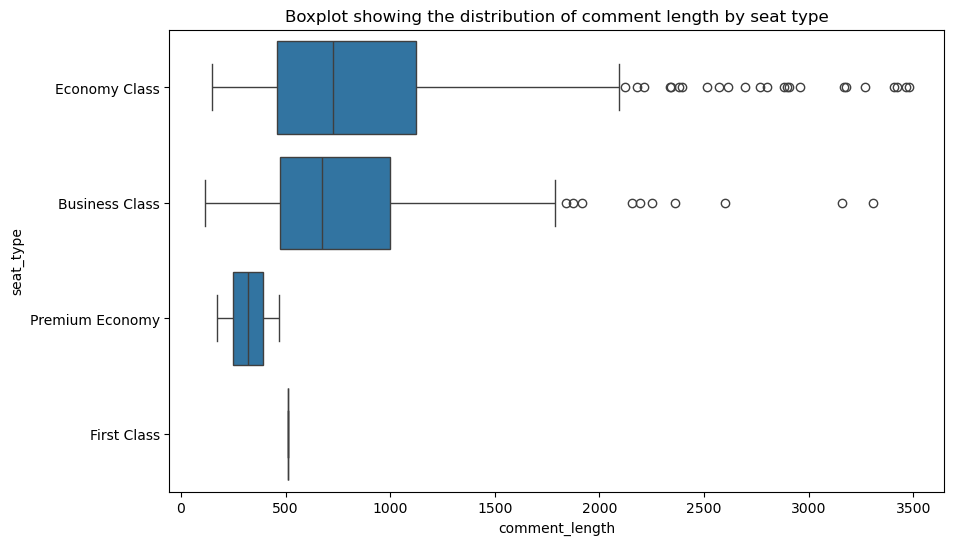

In [4]:
plt.figure(figsize=(10,6))
sns.boxplot(data=processed_df, y = 'seat_type', x='comment_length')
plt.title("Boxplot showing the distribution of comment length by seat type")
plt.savefig("output/boxplot_showing_the_distribution_of_comment_length_by_seat type.png")
plt.show()

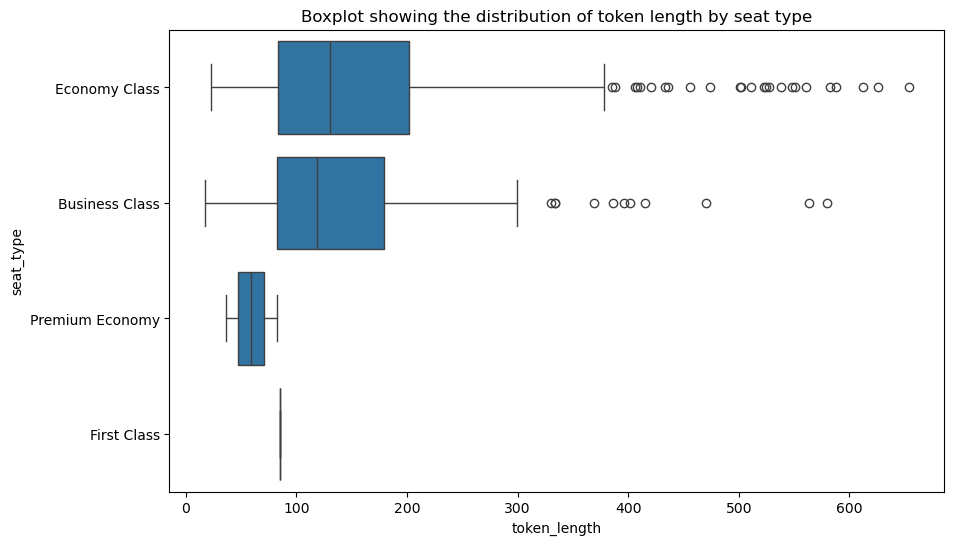

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(data=processed_df, y = 'seat_type', x='token_length')
plt.title("Boxplot showing the distribution of token length by seat type")
plt.show()

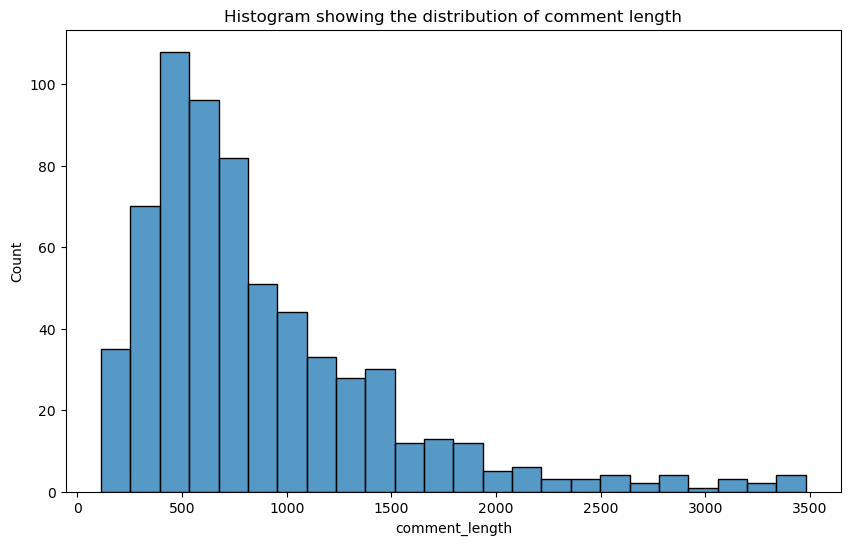

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(data=processed_df, x ='comment_length')
plt.title("Histogram showing the distribution of comment length")
plt.savefig("output/hist_showing_the_distribution_of_comment_length")
plt.show()

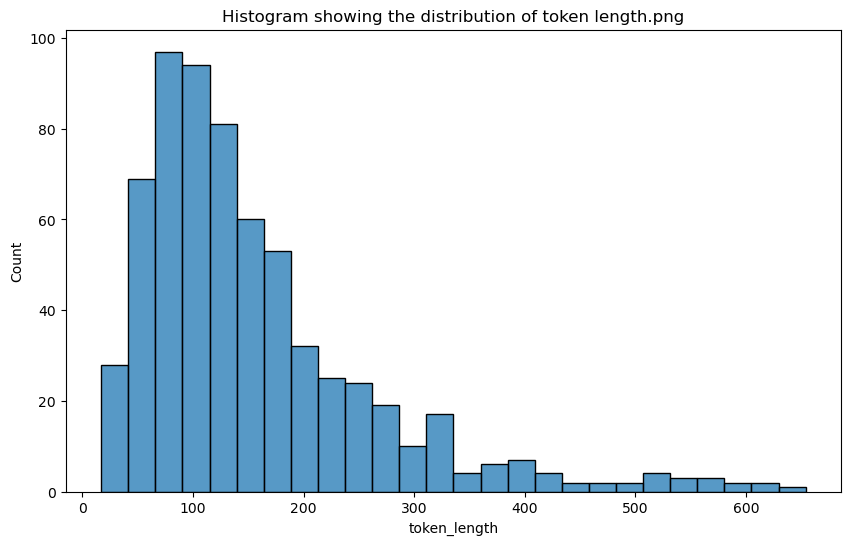

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(data=processed_df, x ='token_length')
plt.title("Histogram showing the distribution of token length.png")
plt.show()

# Correlation matrix

In [8]:
corr_matrix = processed_df.drop(["seat_type"], axis =1).corr()
corr_matrix

,comment_length,token_length,seat_type_Business Class,seat_type_Economy Class,seat_type_First Class,seat_type_Premium Economy,scaled_comment_length
comment_length,1.000000,0.995968,-0.038479,0.047440,-0.023833,-0.051442,1.000000
token_length,0.995968,1.000000,-0.048780,0.057591,-0.025678,-0.049646,0.995968
seat_type_Business Class,-0.038479,-0.048780,1.000000,-0.986117,-0.019969,-0.028262,-0.038479
seat_type_Economy Class,0.047440,0.057591,-0.986117,1.000000,-0.075974,-0.107526,0.047440
seat_type_First Class,-0.023833,-0.025678,-0.019969,-0.075974,1.000000,-0.002177,-0.023833
seat_type_Premium Economy,-0.051442,-0.049646,-0.028262,-0.107526,-0.002177,1.000000,-0.051442
scaled_comment_length,1.000000,0.995968,-0.038479,0.047440,-0.023833,-0.051442,1.000000


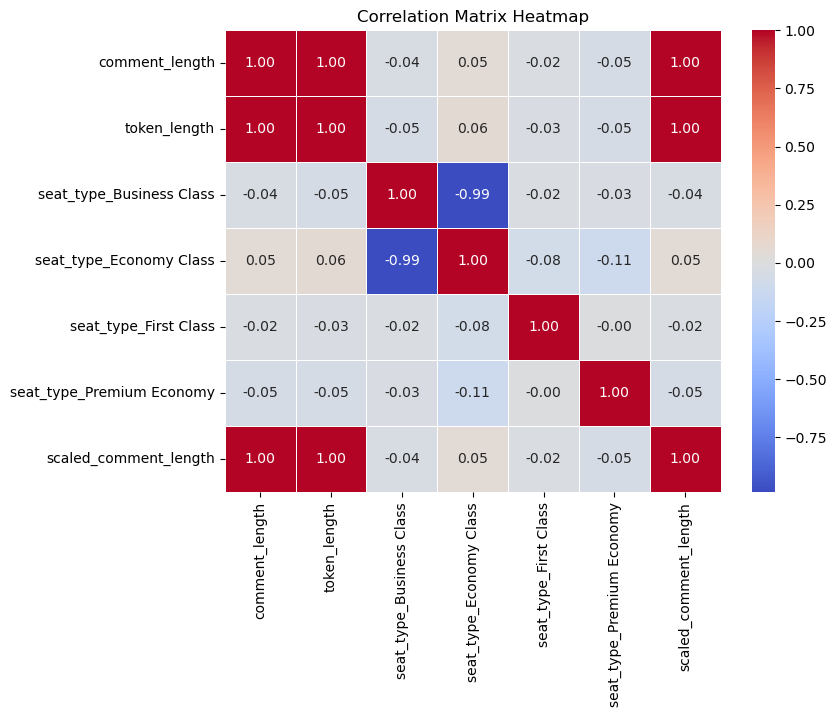

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.savefig("output/correlation_matrix_heatmap.png")
plt.show()